# Machine learning 

#### Importing the ML feeding table

In [1]:
from google.cloud import bigquery
import pandas as pd
from dotenv import load_dotenv
import os
from sklearn.cluster import KMeans
import numpy as np4
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load environment variables from .env file
load_dotenv()

# Now you can use the environment variable
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.getenv("GOOGLE_APPLICATION_CREDENTIALS")


# Create a BigQuery client
client = bigquery.Client()

# Your BigQuery query
query = """
SELECT * FROM `big-mamma-project.ML_tables.ML_table_3_booking_order_not_null`
"""

# Run the query and convert it to a pandas dataframe
ml = client.query(query,location="EU").to_dataframe()

# Now df is a pandas DataFrame containing the results of the query
ml.drop(columns="order_id",inplace=True)
ml.head(10)

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,card_payment,invoice_payment,cash_payment,...,covers,revenue_per_cover,high_spender,total_main_items,total_starters_items,total_desserts_items,total_beverages_items,total_visits,total_cancellations,total_noshows
0,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,6,27.22,<NA>,6.0,2.0,0.0,1.0,1,<NA>,<NA>
1,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,45.22,<NA>,2.0,4.0,0.0,4.0,1,<NA>,<NA>
2,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,3,20.68,<NA>,1.0,1.0,0.0,1.0,1,<NA>,<NA>
3,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,18.59,<NA>,2.0,0.0,0.0,3.0,1,<NA>,<NA>
4,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,20.28,<NA>,2.0,0.0,1.0,1.0,1,<NA>,<NA>
5,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,1,<NA>,<NA>,...,4,30.31,<NA>,4.0,0.0,0.0,4.0,1,<NA>,<NA>
6,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,25.86,<NA>,2.0,1.0,1.0,1.0,1,<NA>,<NA>
7,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,20.79,<NA>,2.0,0.0,0.0,1.0,1,<NA>,<NA>
8,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,1,<NA>,<NA>,...,2,30.42,<NA>,1.0,0.0,1.0,1.0,1,<NA>,<NA>
9,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,...,2,40.63,<NA>,2.0,0.0,1.0,2.0,1,<NA>,<NA>


## DF preparation


#### Finding and filling NAs

In [2]:
#Displaying NAs count per column
ml.isnull().sum()

Sunday                   591450
Monday                   613246
Tuesday                  615280
Wednesday                611247
Thursday                 604794
Friday                   595463
Saturday                 580022
card_payment             590786
invoice_payment          201795
cash_payment             675693
DINNER                   320106
LUNCH                    456279
AFTERNOON                650500
actual_duration           21666
covers                    21666
revenue_per_cover         21666
high_spender             597503
total_main_items          44790
total_starters_items      44790
total_desserts_items      44790
total_beverages_items     44790
total_visits                779
total_cancellations      697814
total_noshows            698064
dtype: int64

In [3]:
ml.dtypes

Sunday                     Int64
Monday                     Int64
Tuesday                    Int64
Wednesday                  Int64
Thursday                   Int64
Friday                     Int64
Saturday                   Int64
card_payment               Int64
invoice_payment            Int64
cash_payment               Int64
DINNER                     Int64
LUNCH                      Int64
AFTERNOON                  Int64
actual_duration            Int64
covers                     Int64
revenue_per_cover        float64
high_spender               Int64
total_main_items         float64
total_starters_items     float64
total_desserts_items     float64
total_beverages_items    float64
total_visits               Int64
total_cancellations        Int64
total_noshows              Int64
dtype: object

# NAs filling methods

#### Mean value

In [4]:
# Fill missing values with the mean of each column
    #Converting df to Float
ml = ml.astype(float).fillna((ml.mean()))
ml.isnull().sum()

Sunday                   0
Monday                   0
Tuesday                  0
Wednesday                0
Thursday                 0
Friday                   0
Saturday                 0
card_payment             0
invoice_payment          0
cash_payment             0
DINNER                   0
LUNCH                    0
AFTERNOON                0
actual_duration          0
covers                   0
revenue_per_cover        0
high_spender             0
total_main_items         0
total_starters_items     0
total_desserts_items     0
total_beverages_items    0
total_visits             0
total_cancellations      0
total_noshows            0
dtype: int64

#### Correlation check and heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

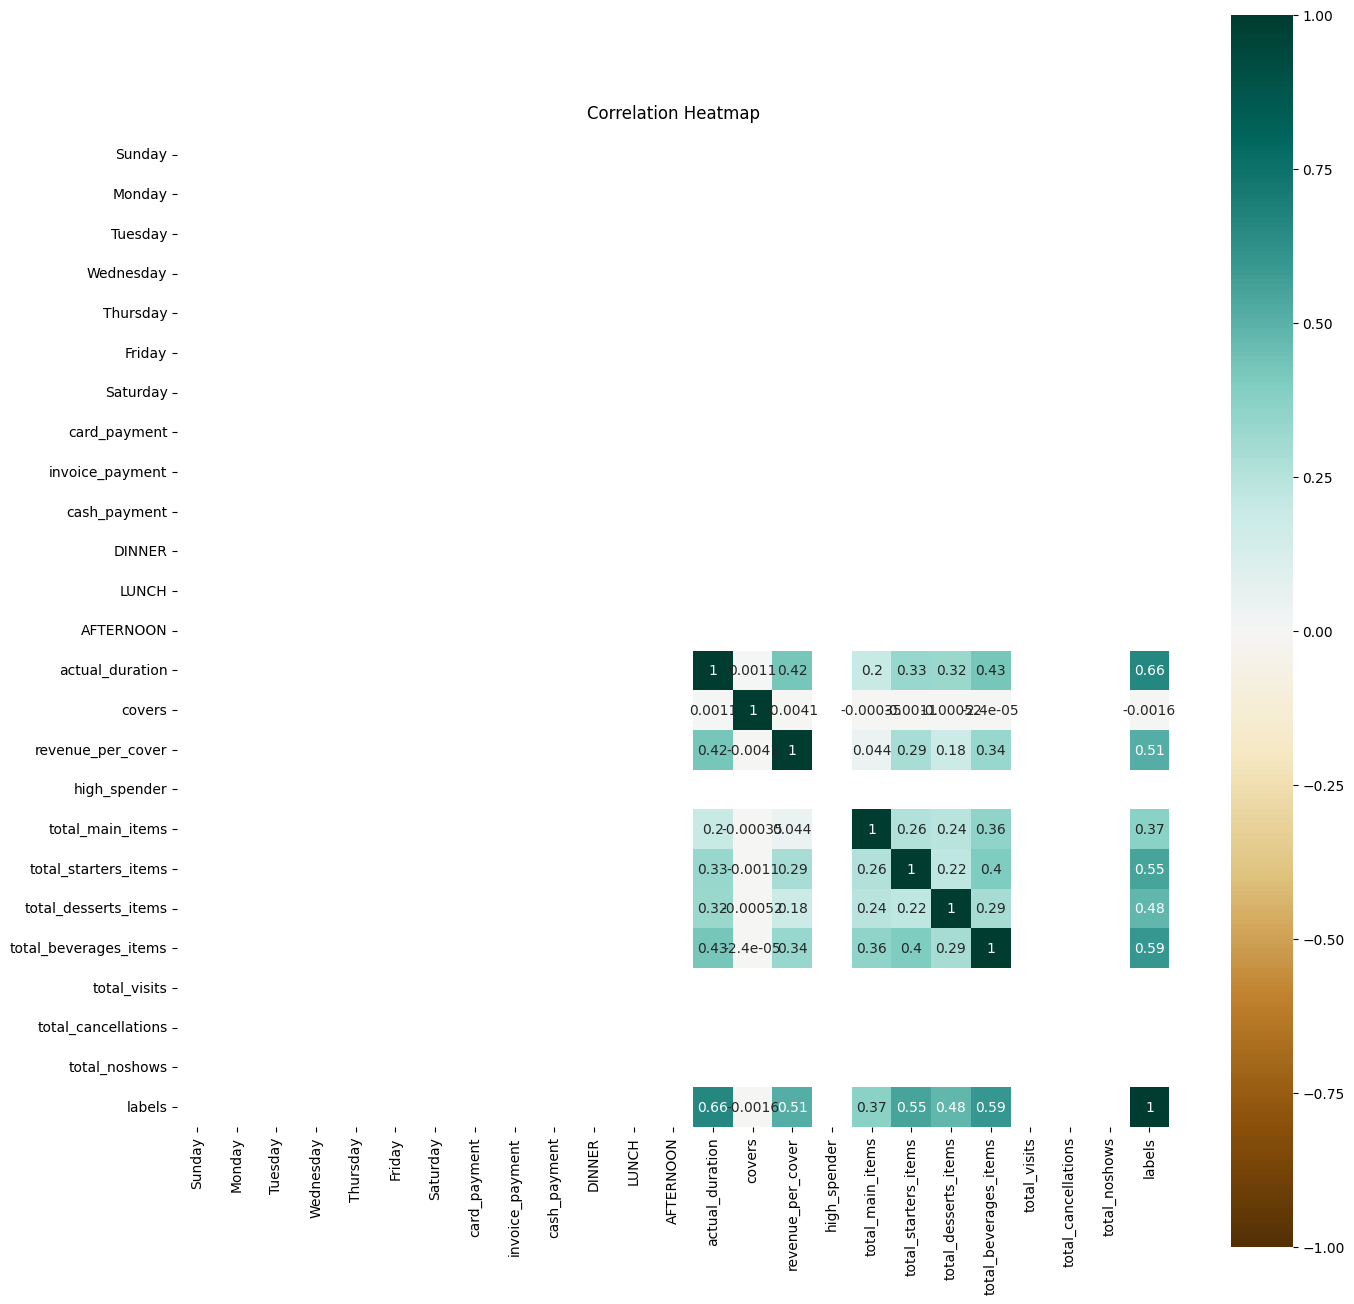

In [55]:
# Increase the size of the heatmap.
plt.figure(figsize=(16,16))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(ml.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG',square=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
# plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

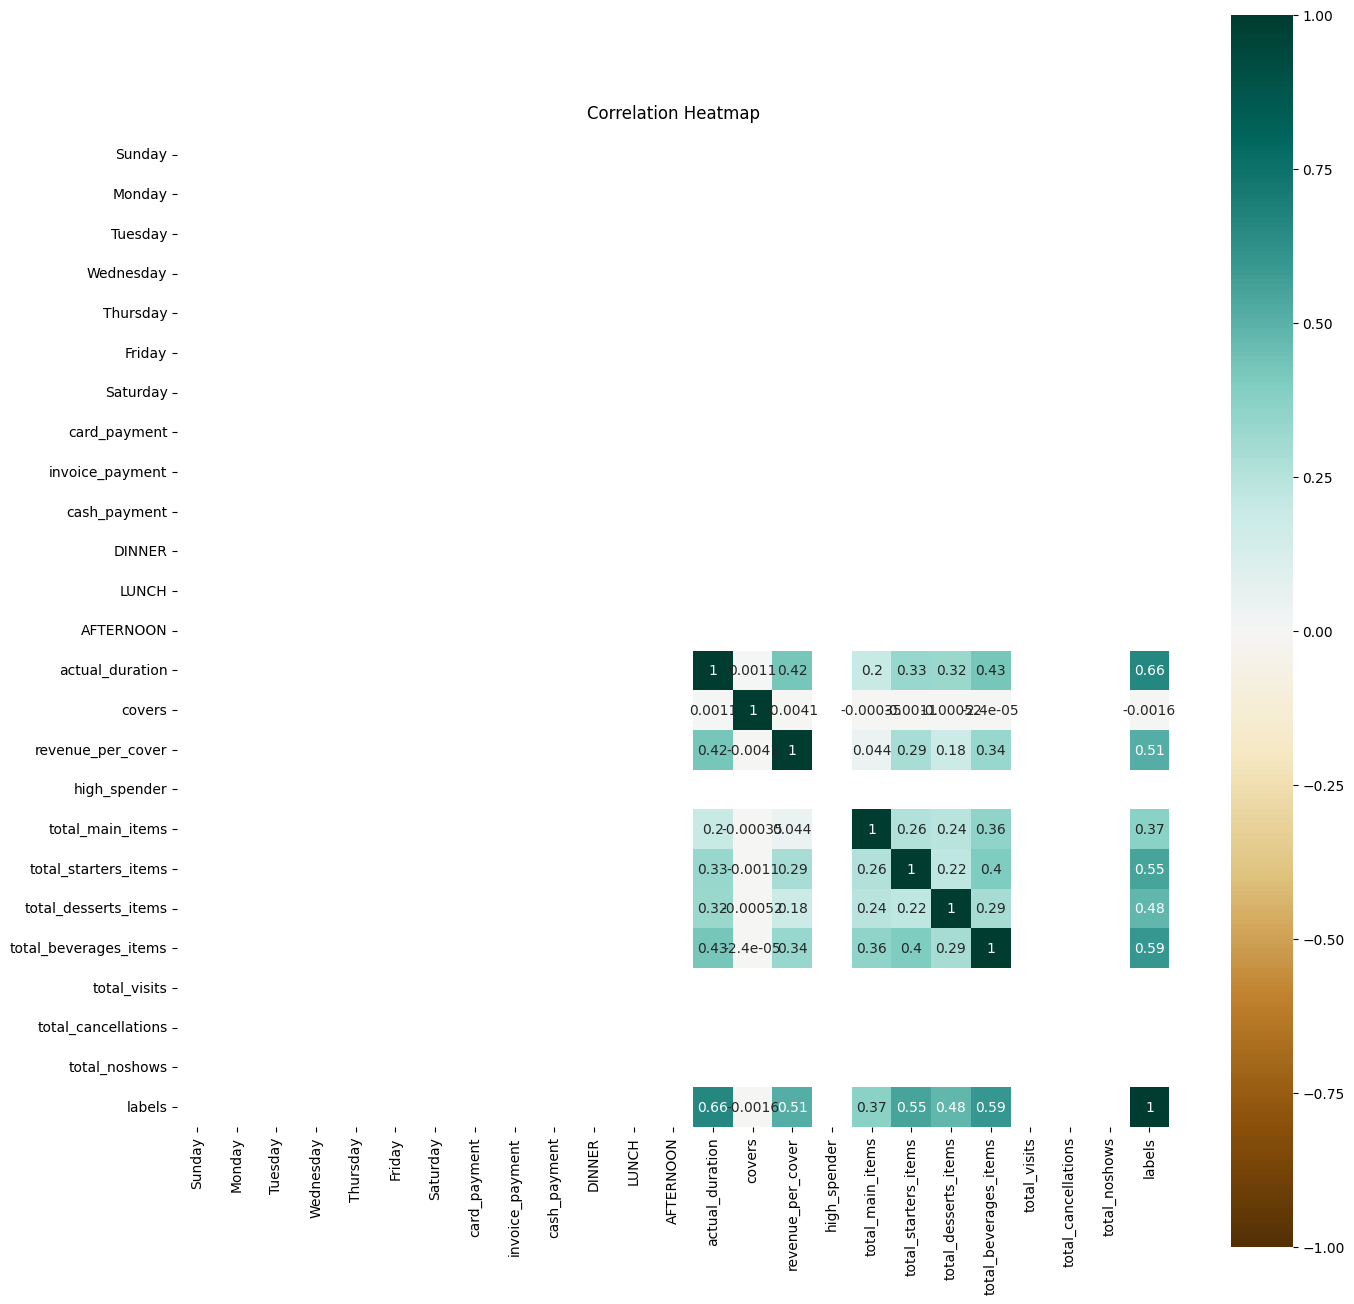

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the size of the heatmap.
plt.figure(figsize=(16, 16))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', square=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

# Show the plot
plt.show()

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

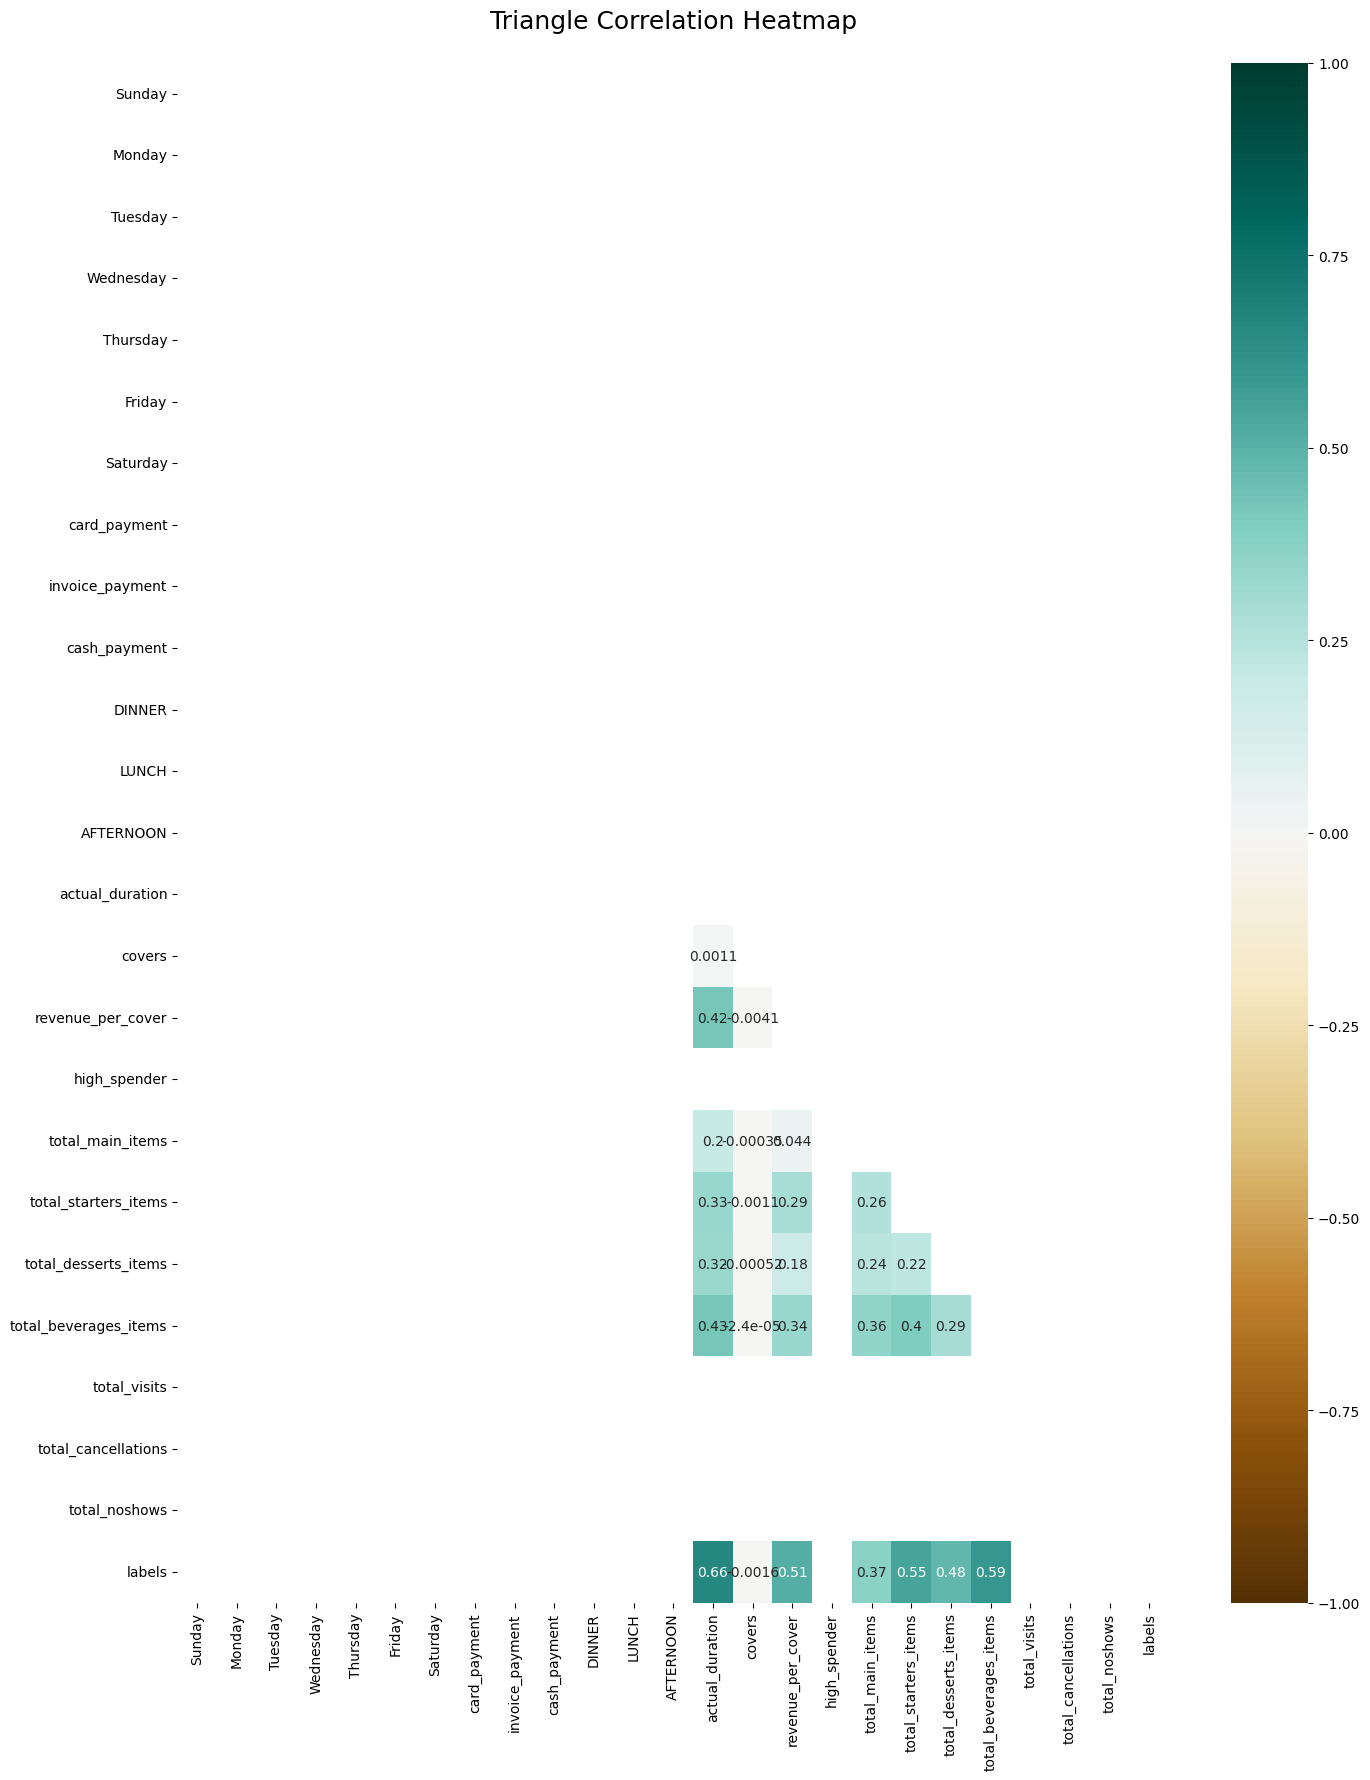

In [53]:
plt.figure(figsize=(16,20))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(ml.corr(), dtype=bool))
heatmap = sns.heatmap(ml.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=25)

#### Distribution check

In [21]:
ml_distribution = pd.DataFrame(ml.sum(axis=0))
ml_distribution.rename(columns={0:'count'},inplace=True)
ml_distribution['percent'] = round((ml_distribution['count']/len(ml))*100,2)
ml_distribution.sort_values(by='percent',ascending=True)

,count,percent
total_desserts_items,6.122695e+05,87.68
Sunday,6.983060e+05,100.00
total_visits,6.983060e+05,100.00
high_spender,6.983060e+05,100.00
AFTERNOON,6.983060e+05,100.00
total_cancellations,6.983060e+05,100.00
DINNER,6.983060e+05,100.00
cash_payment,6.983060e+05,100.00
LUNCH,6.983060e+05,100.00
card_payment,6.983060e+05,100.00


#### Scaling features


In [22]:
#Scaling the ML table and storing the output 
#Initializing and training scaler 
scaler=StandardScaler()
ml_scaled=scaler.fit_transform(ml)


In [23]:
#Checking our scaled features 
ml_scaled_df=pd.DataFrame(ml_scaled,columns=scaler.get_feature_names_out())
ml_scaled_df

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,card_payment,invoice_payment,cash_payment,...,covers,revenue_per_cover,high_spender,total_main_items,total_starters_items,total_desserts_items,total_beverages_items,total_visits,total_cancellations,total_noshows
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000227,-0.526580,0.0,2.152398,0.248012,-0.687849,-0.813743,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002498,0.486047,0.0,-0.280989,1.508204,-0.687849,0.160665,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.001931,-0.894502,0.0,-0.889336,-0.382084,-0.687849,-0.813743,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002498,-1.012079,0.0,-0.280989,-1.012180,-0.687849,-0.164137,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002498,-0.917005,0.0,-0.280989,-1.012180,0.096657,-0.813743,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002498,0.342029,0.0,0.327358,0.248012,-0.687849,0.810271,0.0,0.0,0.0
698302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000340,-1.202228,0.0,2.152398,-0.382084,-0.687849,-1.138546,0.0,0.0,0.0
698303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.001931,-1.202228,0.0,-0.280989,-0.382084,-0.687849,-1.138546,0.0,0.0,0.0
698304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002498,-0.682413,0.0,-0.280989,-0.382084,-0.687849,-0.813743,0.0,0.0,0.0


#### First clustering test 

labels
0    333194
1    307143
2     57969
Name: Sunday, dtype: int64


<Axes: xlabel='labels', ylabel='count'>

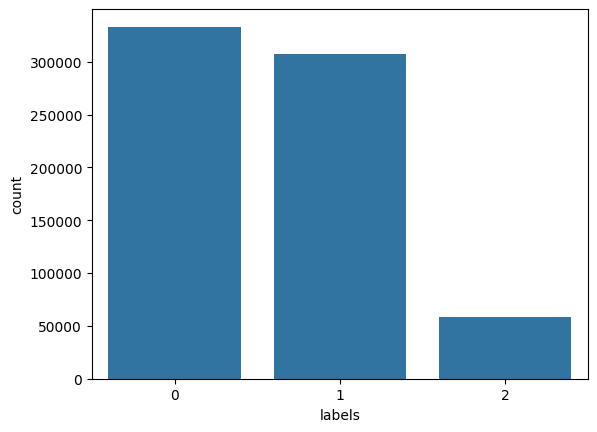

In [58]:
#Lauching clustering prediction
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto").fit(ml_scaled)
labels_scaled=kmeans.predict(ml_scaled)

#Applying labels to the original dataframe
ml['labels']=labels_scaled
ml_distrib=ml.groupby('labels',as_index=True)['Sunday'].count()

#Printing number + graph to vizualize 
print(ml_distrib)
sns.countplot(ml,x='labels')

# Silhouette and Elbow check to find the proper number of cluster 

#### Silhouette method 

In [ ]:

# from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score

# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import numpy as np
# import matplotlib.style as style

# range_n_clusters = [2, 3, 4, 5, 6]
# silhouette_avg_n_clusters = []

# for n_clusters in range_n_clusters:
#     # Create a subplot with 1 row and 2 columns
#     # fig, (ax1, ax2) = plt.subplots(1, 2)
#     # fig.set_size_inches(18, 7)

#     # # The 1st subplot is the silhouette plot
#     # # The silhouette coefficient can range from -1, 1 but in this example all
#     # # lie within [-0.1, 1]
#     # ax1.set_xlim([-0.1, 1])
#     # # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # # plots of individual clusters, to demarcate them clearly.
#     # ax1.set_ylim([0, len(ml_scaled) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, n_init=5, random_state=0)
#     cluster_labels = clusterer.fit_predict(ml)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(ml, cluster_labels)
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", silhouette_avg)

#     silhouette_avg_n_clusters.append(silhouette_avg)
#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(ml, cluster_labels)

# #     y_lower = 10
# #     for i in range(n_clusters):
# #         # Aggregate the silhouette scores for samples belonging to
# #         # cluster i, and sort them
# #         ith_cluster_silhouette_values = \
# #             sample_silhouette_values[cluster_labels == i]

# #         ith_cluster_silhouette_values.sort()

# #         size_cluster_i = ith_cluster_silhouette_values.shape[0]
# #         y_upper = y_lower + size_cluster_i

# #         color = cm.nipy_spectral(float(i) / n_clusters)
# #         ax1.fill_betweenx(np.arange(y_lower, y_upper),
# #                           0, ith_cluster_silhouette_values,
# #                           facecolor=color, edgecolor=color, alpha=0.7)

# #         # Label the silhouette plots with their cluster numbers at the middle
# #         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

# #         # Compute the new y_lower for next plot
# #         y_lower = y_upper + 10  # 10 for the 0 samples

# #     ax1.set_title("The silhouette plot for the various clusters.")
# #     ax1.set_xlabel("The silhouette coefficient values")
# #     ax1.set_ylabel("Cluster label")

# #     # The vertical line for average silhouette score of all the values
# #     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# #     ax1.set_yticks([])  # Clear the yaxis labels / ticks
# #     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# #     # 2nd Plot showing the actual clusters formed
# #     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
# #     ax2.scatter(ml_scaled[:, 0], ml_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
# #                 c=colors, edgecolor='k')

# #     # Labeling the clusters
# #     centers = clusterer.cluster_centers_
# #     # Draw white circles at cluster centers
# #     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
# #                 c="white", alpha=1, s=200, edgecolor='k')

# #     for i, c in enumerate(centers):
# #         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
# #                     s=50, edgecolor='k')

# #     ax2.set_title("The visualization of the clustered data.")
# #     ax2.set_xlabel("Feature space for the 1st feature")
# #     ax2.set_ylabel("Feature space for the 2nd feature")

# #     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
# #                   "with n_clusters = %d" % n_clusters),
# #                  fontsize=14, fontweight='bold')

# # plt.show()


# # style.use("fivethirtyeight")
# # plt.plot(range_n_clusters, silhouette_avg_n_clusters)
# # plt.xlabel("Number of Clusters (k)")
# # plt.ylabel("silhouette score")
# # plt.show()


#### Elbow method 

In [59]:
#Elbow method
inertias = []
n_k = range(1, 10)

# for each number of centroids
for k in n_k:
     kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(ml_scaled)
     inertias.append(kmeans.inertia_)
print(inertias )

[4888141.999999981, 3919588.7383748554, 3558939.07103856, 2914274.5280191307, 2710750.314627547, 2518778.2190493606, 2365092.1842517094, 2257348.755980202, 2155396.666581777]


In [27]:
#Plotting the inertias
import plotly.express as px 
fig = px.line(inertias)
fig.show()

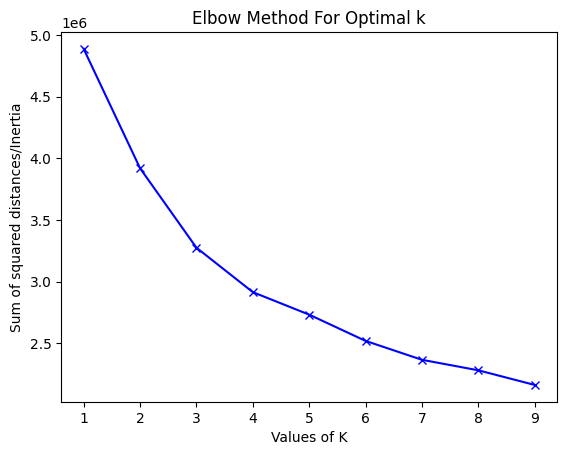

In [28]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters,n_init="auto")
 kmeans.fit(ml_scaled)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

# Exploring results

##### Heatmap

In [38]:
# Analyzing Cluster Results
import matplotlib.pyplot as plt
import seaborn as sns

#Creating heatmap
cm = sns.light_palette("green", as_cmap=True)
#a remettre en ml au lieu de ml_scaled
ml.groupby('labels')[ml.columns[1:-1]].mean().style.background_gradient(cmap=cm)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,card_payment,invoice_payment,cash_payment,DINNER,LUNCH,AFTERNOON,actual_duration,covers,revenue_per_cover,high_spender,total_main_items,total_starters_items,total_desserts_items,total_beverages_items,total_visits,total_cancellations,total_noshows
labels,,,,,,,,,,,,,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62.622502,9.809841,27.313438,1.000000,2.079441,0.838991,0.371778,2.115302,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,101.900131,3.101912,43.527798,1.000000,2.412644,2.013598,1.084988,3.871425,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,137.202453,4.279460,53.033069,1.000000,4.921047,3.859699,2.676411,9.555390,1.000000,1.000000,1.000000


#### Scatter plot

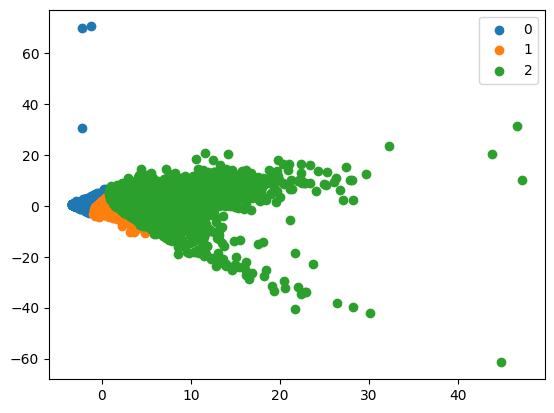

In [42]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

#Transform the data
pca = PCA(2)
ml_results= pca.fit_transform(ml_scaled)


#Getting unique labels
u_labels = np.unique(labels_scaled)
 
#plotting the results:
for i in u_labels:
    plt.scatter(ml_results[labels_scaled == i , 0] , ml_results[labels_scaled == i , 1] , label= i)
plt.legend()
plt.show()

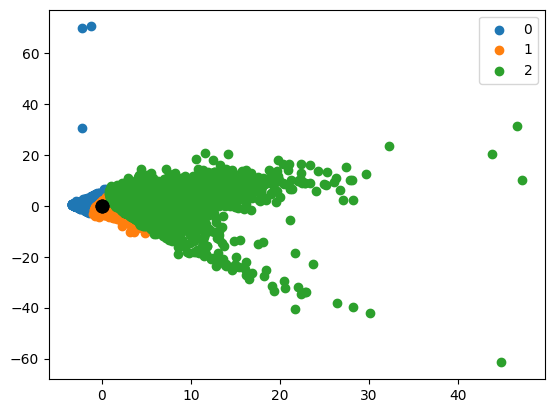

In [43]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels_scaled)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(ml_results[labels_scaled == i , 0] , ml_results[labels_scaled == i , 1] , label= i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()